In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("eeshawn/flickr30k")

print("Path to dataset files:", path)

Resuming download from 401604608 bytes (3979318369 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/eeshawn/flickr30k?dataset_version_number=1 (401604608/4380922977) bytes left.


100%|██████████| 4.08G/4.08G [03:09<00:00, 21.0MB/s]

Extracting files...


Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\eeshawn\flickr30k\versions\1


In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Ruta de la carpeta de origen
path = 'C:/Users/HP/.cache/kagglehub/datasets/eeshawn/flickr30k/versions/1/flickr30k_images'

# Crear carpetas de destino para entrenamiento y testeo
train_dir = 'C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/train'
test_dir = 'C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Listar todas las imágenes en la carpeta de origen
all_images = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Dividir las imágenes en grupos de entrenamiento y testeo (80% entrenamiento, 20% testeo)
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Función para copiar imágenes a la carpeta de destino
def copy_images(image_list, destination_folder):
    for image in image_list:
        src = os.path.join(path, image)
        dst = os.path.join(destination_folder, image)
        shutil.copyfile(src, dst)

# Copiar las imágenes a las carpetas de destino
copy_images(train_images, train_dir)
copy_images(test_images, test_dir)

print(f"Imágenes de entrenamiento: {len(train_images)}")
print(f"Imágenes de testeo: {len(test_images)}")

Imágenes de entrenamiento: 25426
Imágenes de testeo: 6357


In [20]:
import os
from PIL import Image, ImageFilter
import torchvision.transforms as transforms

# Definir una transformación para imágenes de baja calidad
low_quality_transform = transforms.Compose([
    transforms.Lambda(lambda img: img.filter(ImageFilter.GaussianBlur(radius=2))),  # Aplicar desenfoque gaussiano
    transforms.ToTensor(),
])

# Ruta de la carpeta de origen y destino
source_folder = 'C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/train/highQuality'
destination_folder = 'C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/train/lowQuality'

# Crear la carpeta de destino si no existe
os.makedirs(destination_folder, exist_ok=True)

# Listar todas las imágenes en la carpeta de origen
all_images = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Aplicar la transformación y guardar las imágenes en la carpeta de destino
for image_name in all_images:
    # Abrir la imagen
    image_path = os.path.join(source_folder, image_name)
    image = Image.open(image_path)

    # Aplicar la transformación
    low_quality_image = low_quality_transform(image)

    # Convertir el tensor de vuelta a imagen PIL
    low_quality_image = transforms.ToPILImage()(low_quality_image)

    # Guardar la imagen transformada en la carpeta de destino
    low_quality_image.save(os.path.join(destination_folder, image_name))

print(f"Transformación completada. Imágenes guardadas en {destination_folder}")

Transformación completada. Imágenes guardadas en C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/train/lowQuality


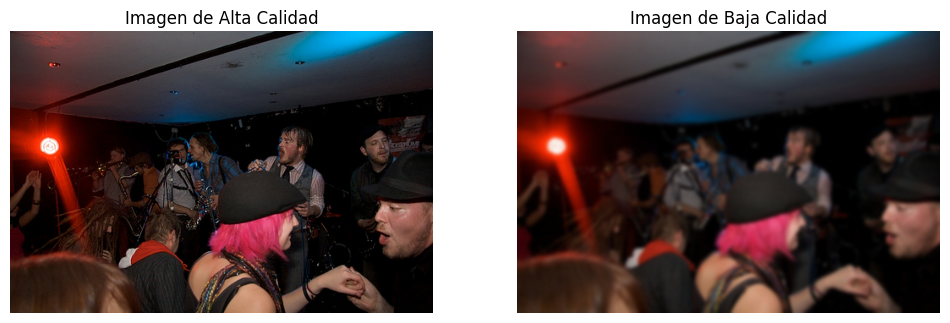

In [16]:
import os
from PIL import Image, ImageFilter
import torchvision.transforms as transforms
import torch

# Definir una transformación para imágenes de baja calidad
low_quality_transform = transforms.Compose([
    transforms.Lambda(lambda img: img.filter(ImageFilter.GaussianBlur(radius=2))),  # Aplicar desenfoque gaussiano
    transforms.ToTensor(),
])

# Transformación para imágenes de alta calidad
high_quality_transform = transforms.ToTensor()

# Ruta del archivo
file_path = 'C:/Users/HP/.cache/kagglehub/datasets/eeshawn/flickr30k/versions/1/flickr30k_images/3970654971.jpg'

# Verificar si el archivo existe
if not os.path.exists(file_path):
    print(f"El archivo no se encuentra en la ruta especificada: {file_path}")
else:
    # Cargar una imagen de ejemplo
    image = Image.open(file_path)

    # Generar las versiones de alta y baja calidad
    high_quality_image = high_quality_transform(image)
    low_quality_image = low_quality_transform(image)

    # Mostrar las imágenes
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mostrar imagen de alta calidad
    axes[0].imshow(high_quality_image.permute(1, 2, 0))
    axes[0].set_title('Imagen de Alta Calidad')
    axes[0].axis('off')

    # Mostrar imagen de baja calidad
    axes[1].imshow(low_quality_image.permute(1, 2, 0))
    axes[1].set_title('Imagen de Baja Calidad')
    axes[1].axis('off')

    plt.show()



In [39]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import math

# Descargue la base de datos aqui

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 64

img_transform = transform.Compose([
    transform.Resize((28, 28)),  # Redimensionar las imágenes a 28x28
    transform.ToTensor(),
    transform.Normalize((0.5,), (0.5,))
])

trainHigh_dir = 'C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/train/highQuality'
trainLow_dir = 'C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/train/lowQuality'
test_dir = 'C:/Users/HP/Desktop/UTEC/Ciclo_VIII/CGrafica/testProy/dataset/test'

trainLow_set = torchvision.datasets.ImageFolder(root=trainLow_dir, transform=img_transform)
trainHigh_set = torchvision.datasets.ImageFolder(root=trainHigh_dir, transform=img_transform)
test_set = torchvision.datasets.ImageFolder(root=test_dir, transform=img_transform)

img, _ = trainLow_set[0]
print(img.shape)

train_loader_low_quality = torch.utils.data.DataLoader(dataset=trainLow_set, batch_size=batch_size, shuffle=True)
train_loader_high_quality = torch.utils.data.DataLoader(dataset=trainHigh_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)



cpu
torch.Size([3, 28, 28])


In [50]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, stride=2, padding=1)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=64*2, kernel_size=4, stride=2, padding=1)
    self.fc = nn.Linear(in_features=64*2*7*7, out_features=10)

  def forward(self, image):
    # print("image",image.shape)
    out = F.relu(self.conv1(image))
    # print("convolucion1",out.shape)
    out = F.relu(self.conv2(out))
    # print("convolucion2",out.shape)
    out = out.view(out.size(0), -1)
    # print("MLP",out.shape)
    z = self.fc(out)
    return z

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.fc    = nn.Linear(in_features=10,out_features=2*64*7*7)
    self.convTran1 = nn.ConvTranspose2d(in_channels=2*64,out_channels=64, kernel_size=4, stride=2, padding=1)
    self.convTran2 = nn.ConvTranspose2d(in_channels=64,out_channels=3, kernel_size=4, stride=2, padding=1)

  def forward(self, latent):
    out = self.fc(latent)
    # print("MLP",out.shape)
    out = out.view(out.size(0), 64*2, 7, 7)
    # print("decon1",out.shape)
    out = F.relu(self.convTran1(out))
    # print("decon1",out.shape)
    out = torch.tanh(self.convTran2(out))
    # print("decon1",out.shape)
    return out


In [41]:
class Autoencoder(nn.Module):
   def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

   def forward(self, x):
        latent = self.encoder(x)
        x_recon = self.decoder(latent)
        return  x_recon

In [60]:
# Supongamos que tienes un dataset con imágenes de baja y alta calidad
# train_loader_low_quality y train_loader_high_quality

def train(model, train_loader_low_quality, train_loader_high_quality, epochs, loss_fn):
    print("Training the model...")
    train_loss_avg = []
    for epoch in range(epochs):
        print('Epoch [%d / %d]' % (epoch+1, epochs))
        train_loss_avg.append(0)
        num_batches = 0

        for (image_batch_low, _), (image_batch_high, _) in zip(train_loader_low_quality, train_loader_high_quality):
            # print(image_batch_low.shape)
            image_batch_low = image_batch_low.to(device)
            image_batch_high = image_batch_high.to(device)

            image_batch_recon = model(image_batch_low)
            loss = loss_fn(image_batch_recon, image_batch_high)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss_avg[-1] += loss.item()
            num_batches += 1

        train_loss_avg[-1] /= num_batches
        print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, epochs, train_loss_avg[-1]))

    return train_loss_avg

In [61]:
# Definir el autoencoder, la función de pérdida y el optimizador
autoencoder = Autoencoder().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)

# Entrenar el autoencoder
autoencoder.train()
loss_result = train(autoencoder, train_loader_low_quality, train_loader_high_quality, 10, loss_fn)

Training the model...
Epoch [1 / 10]
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size(

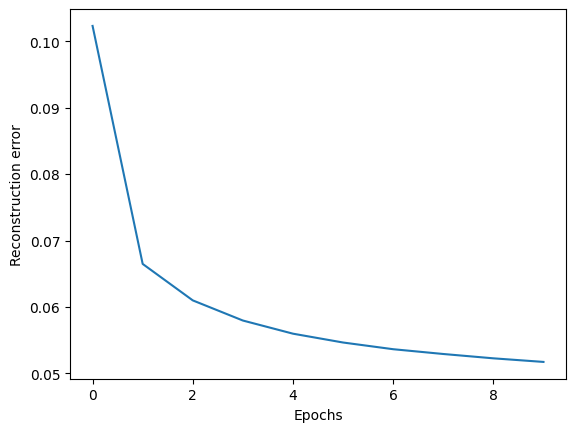

In [ ]:
fig = plt.figure()
plt.plot(loss_result)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

In [ ]:
def Show(out, title = ''):
  print(title)
  out = out.permute(1,0,2,3)
  grilla = torchvision.utils.make_grid(out,10,5)
  plt.imshow(transform.ToPILImage()(grilla), 'jet')
  plt.show()

def Show_Weight(out):
  grilla = torchvision.utils.make_grid(out)
  plt.imshow(transform.ToPILImage()(grilla), 'jet')
  plt.show()

60


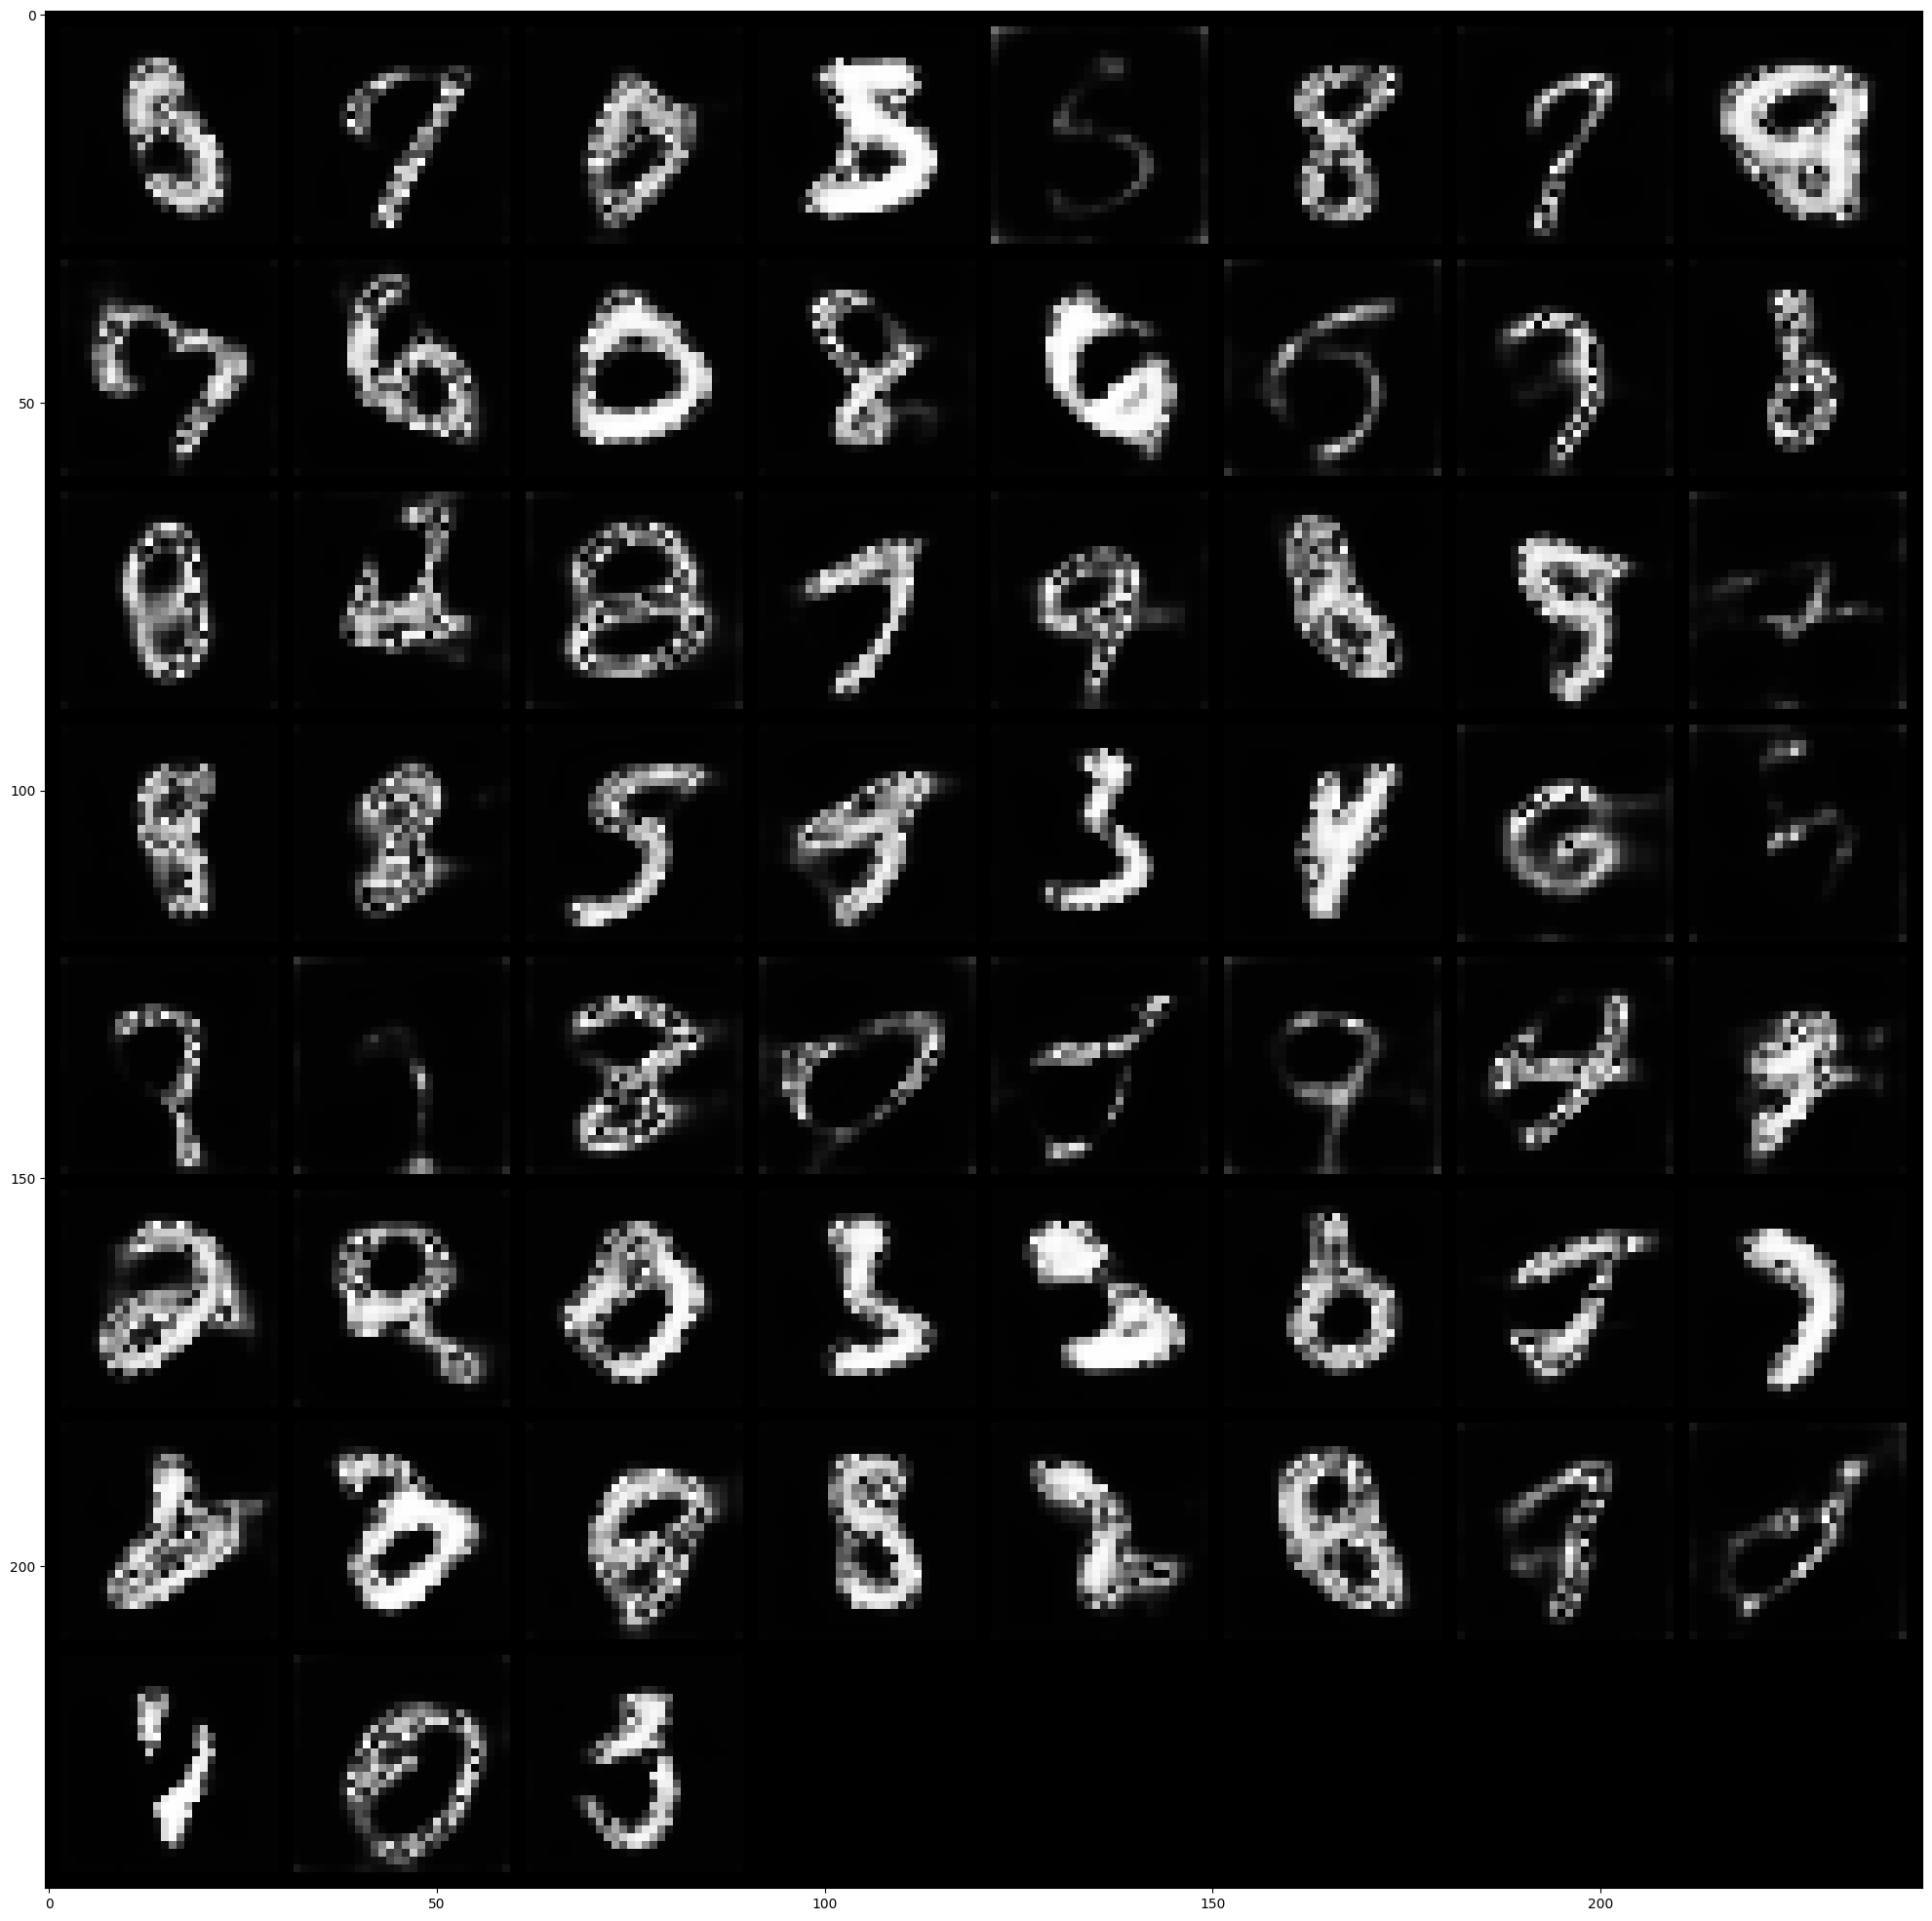

In [ ]:
# Evaluar el modelo con imágenes de prueba de baja calidad
autoencoder.eval()
with torch.no_grad():
    for image_batch_low, _ in test_loader_low_quality:
        image_batch_low = image_batch_low.to(device)
        image_batch_recon = autoencoder(image_batch_low)
        # Visualizar las imágenes originales y reconstruidas
        Show(image_batch_low, title='Low Quality Images')
        Show(image_batch_recon, title='Reconstructed Images')

In [ ]:
from typing_extensions import Required
import sys
model = torchvision.models.vgg19(pretrained=True)
print(torchvision.models)


for e  in model.parameters():
   e.requeres_grad = False



print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 83.9MB/s]


<module 'torchvision.models' from '/usr/local/lib/python3.10/dist-packages/torchvision/models/__init__.py'>
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad